In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings 
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('./csv파일/데이터셋_3(심각도).csv',encoding='cp949')

In [36]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자,도로종류,도로형태,도로선형,발생시각,심각도
0,보도통행중,20세이하,그룹1,그룹2,그룹4,그룹5,기타,단일로,평지,낮,0
1,횡단중,65세이상,그룹1,그룹2,그룹5,그룹4,시도,단일로,평지,출퇴근시간,1
2,길가장자리구역통행중,20세이하,그룹1,그룹2,기타/불명,그룹4,시도,단일로,평지,출퇴근시간,0
3,길가장자리구역통행중,21-30세,그룹1,그룹1,기타/불명,그룹1,기타,단일로,평지,낮,1
4,횡단중,41-50세,그룹1,그룹2,그룹5,그룹4,기타,단일로,평지,낮,1
...,...,...,...,...,...,...,...,...,...,...,...
58054,길가장자리구역통행중,51-60세,그룹1,그룹2,그룹2,그룹4,시도,단일로,평지,낮,0
58055,보도통행중,21-30세,기타,그룹1,그룹2,그룹4,군도,교차로,평지,출퇴근시간,0
58056,차도통행중,31-40세,그룹1,그룹2,그룹4,그룹4,군도,단일로,평지,출퇴근시간,1
58057,기타,65세이상,그룹1,그룹2,그룹4,그룹4,시도,단일로,평지,출퇴근시간,1


In [37]:
x=df.drop(['심각도'],axis=1)
x = pd.get_dummies(x,drop_first=True)
y=pd.DataFrame(df['심각도'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 

In [38]:
log = LogisticRegression()
log.fit(x_train,y_train)

y_pred = log.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.18      0.27      5742
           1       0.70      0.94      0.80     11676

    accuracy                           0.69     17418
   macro avg       0.64      0.56      0.54     17418
weighted avg       0.66      0.69      0.63     17418



In [50]:
pd.DataFrame(y_pred)

,0
0,0
1,1
2,0
3,1
4,1
...,...
17413,1
17414,1
17415,1
17416,1


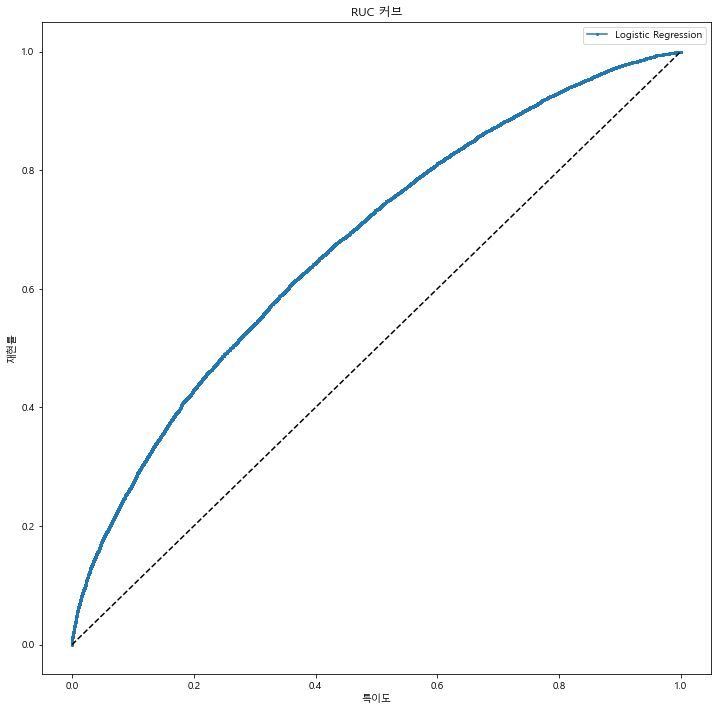

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,12


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fpr, tpr, threshold = roc_curve(y_train, log.decision_function(x_train))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('RUC 커브')
plt.show()

#### AUC 값은 0.5~1의 범위를 가지는데 0.5면 성능이 전혀 없음. 1이면 최고의 성능이라고 할 수 있다.

In [41]:
print('AUC: {}'.format(auc(fpr,tpr)))  # 0.5에 가까울 수록 성능이 좋지 못함

AUC: 0.6755991305247881


#### 위 과정을 통해 로지스틱 회귀 모델을 생성하고 평가

In [42]:
import statsmodels.api as sm

logit = sm.Logit(y,x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589528
         Iterations 8


In [43]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58015
Method:                           MLE   Df Model:                           43
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                 0.07081
Time:                        09:40:31   Log-Likelihood:                -34227.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
사고유형_길가장자리구역통행중     -0.0614      0.038     -1.623      0.105      -0.136       0.013
사고유형_보도통행중           0.1431      0.050      2.871      0.004       0.045       0.241
사고유형_차도통행중           0.1320 

### 오즈비 확인
#### 독립변수들의 오즈비를 구해보자
#### 오즈비는 1을 기준으로 1보다 크면 심각한사고일 확률이 커지고 1보다 작으면 심각하지 않은 사고 일 확률이 커진다는 것을 나타낸다. 
#### 오즈비가 1 이면 결과에 별다른 영향을 미치지 않는 다고 볼 수 있다.
#### 회귀계수가 변수의 오즈비의 로그값이므로 exp을 취해서 보자

In [44]:
print(np.exp(result.params))

사고유형_길가장자리구역통행중      0.940442
사고유형_보도통행중           1.153829
사고유형_차도통행중           1.141108
사고유형_횡단중             1.425698
연령가해자_21-30세         0.982928
연령가해자_31-40세         0.958955
연령가해자_41-50세         0.996945
연령가해자_51-60세         0.957883
연령가해자_61-64세         0.940855
연령가해자_65세이상          0.969956
연령가해자_기타/불명          0.330233
법규위반가해자_그룹2          1.099585
법규위반가해자_그룹3         20.536021
법규위반가해자_기타           0.997346
행동유형가해자_그룹2          1.326395
행동유형가해자_그룹3          1.185013
행동유형가해자_그룹4          0.627911
행동유형가해자_기타/불명        0.968584
피해자신체상해주부위_그룹2       1.461648
피해자신체상해주부위_그룹3       2.402259
피해자신체상해주부위_그룹4       3.601302
피해자신체상해주부위_그룹5       5.075196
피해자신체상해주부위_그룹6       8.940607
피해자신체상해주부위_기타/불명     2.788772
차량용도가해자_그룹2          0.770296
차량용도가해자_그룹3          0.731676
차량용도가해자_그룹4          0.821002
차량용도가해자_그룹5          0.513504
차량용도가해자_기타/불명        0.647913
도로종류_군도              0.589432
도로종류_기타              0.417644
도로종류_시도              0.485591
도로종류_일반국도            0.663107
도로종류_지방도  

#### 오즈비 1 이 넘지 않는  것 삭제 후 다시
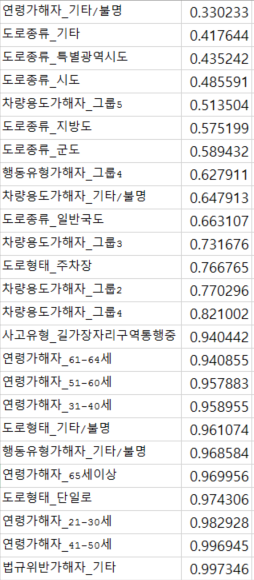

In [45]:
x2 = x.drop(['연령가해자_기타/불명','도로종류_기타','도로종류_특별광역시도','도로종류_시도','차량용도가해자_그룹5','도로종류_지방도'
            ,'도로종류_군도','행동유형가해자_그룹4','차량용도가해자_기타/불명','도로종류_일반국도','차량용도가해자_그룹3'
            ,'도로형태_주차장','차량용도가해자_그룹2','차량용도가해자_그룹4','사고유형_길가장자리구역통행중'
             ,'연령가해자_61-64세','연령가해자_51-60세','연령가해자_31-40세','도로형태_기타/불명','행동유형가해자_기타/불명'
            ,'연령가해자_65세이상','도로형태_단일로','연령가해자_21-30세','연령가해자_41-50세','법규위반가해자_기타'],axis=1)

## 다시 로지스틱 회귀

In [47]:
logit = sm.Logit(y,x2)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.598066
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58040
Method:                           MLE   Df Model:                           18
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                 0.05735
Time:                        09:49:08   Log-Likelihood:                -34723.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
사고유형_보도통행중           0.1121      0.047      2.392      0.017       0.020       0.204
사고유형_차도통행중 

## 오즈비 출력

In [48]:
print(np.exp(result.params))

사고유형_보도통행중           1.118677
사고유형_차도통행중           1.194769
사고유형_횡단중             1.494010
법규위반가해자_그룹2          1.095378
법규위반가해자_그룹3         23.390478
행동유형가해자_그룹2          1.643344
행동유형가해자_그룹3          1.548158
피해자신체상해주부위_그룹2       0.463092
피해자신체상해주부위_그룹3       0.774039
피해자신체상해주부위_그룹4       1.142590
피해자신체상해주부위_그룹5       1.683127
피해자신체상해주부위_그룹6       2.937389
피해자신체상해주부위_기타/불명     0.900046
도로선형_내리막             1.148164
도로선형_오르막             1.011860
도로선형_평지              0.910877
발생시각_새벽~아침           1.742084
발생시각_저녁~자정           1.155065
발생시각_출퇴근시간           1.136834
dtype: float64


## 오즈비 결과에 따르면 다음 순서로 심각한 사고를 일으킬 확률이 높다. (중복 컬럼은 상위 단계만)
### 1. 법규위반가해자_그룹3 (23.390478) 
#### 그룹3: 과속
### 2. 피해자신체상해주부위_그룹6  (2.937389)
#### 그룹6: 가슴 
### 3. 행동유형가해자_그룹2  (1.643344)
#### 그룹2:진로변경중, 직진중